In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

device = torch.device('cpu')

%matplotlib inline

# Linear Regression

In [2]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
x = torch.as_tensor(diabetes['data'][:, np.newaxis, 2], dtype=torch.float)
y = torch.as_tensor(diabetes['target'][:], dtype=torch.float).view(-1, 1)

x.shape, y.shape

(torch.Size([442, 1]), torch.Size([442, 1]))

In [3]:
# define model
model = nn.Linear(1, 1, bias=True)

criterion = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(params=model.parameters(), lr=0.9)

In [4]:
# train the model
losses = []
for i in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# make prediction
with torch.no_grad():
    y_pred = model(x).view(-1).numpy()

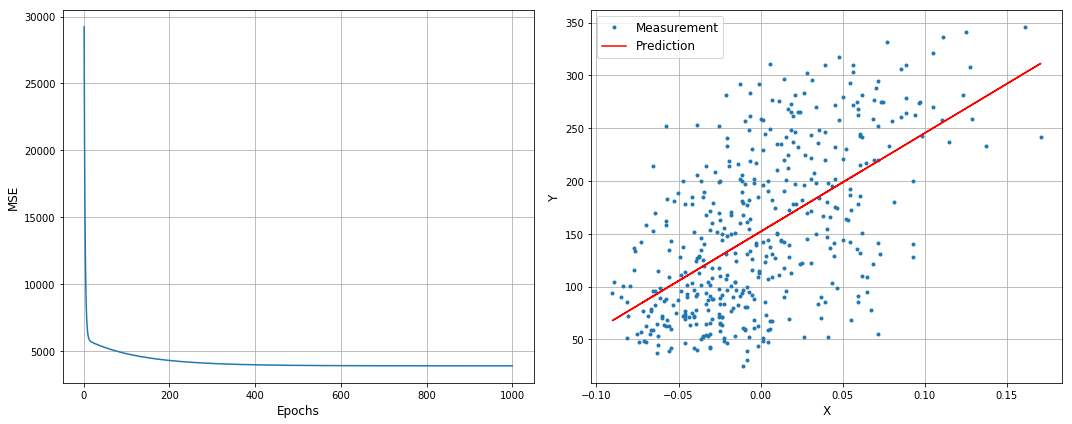

In [5]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(range(1, len(losses) + 1), losses)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)
ax[0].grid(True)

ax[1].plot(x.numpy(), y.numpy(), '.', label='Measurement')
ax[1].plot(x.numpy(), y_pred, 'r-', label='Prediction')
ax[1].set_xlabel('X', fontsize=12)
ax[1].set_ylabel('Y', fontsize=12)
ax[1].grid(True)
ax[1].legend(fontsize=12)
plt.tight_layout()
plt.show()

# Logistic Regression

In [6]:
# load the Iris dataset
x, y = datasets.load_iris(return_X_y=True)
x = x[y < 2]
y = y[y < 2]

# create tensor
x = torch.as_tensor(x, dtype=torch.float)
y = torch.as_tensor(y, dtype=torch.float).view(-1, 1)

print(x.shape, y.shape)

torch.Size([100, 4]) torch.Size([100, 1])


In [7]:
# define model
model = nn.Linear(4, 1, bias=True)

criterion = nn.BCEWithLogitsLoss(reduction='mean')
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

In [8]:
# train the model
losses = []
for i in range(1000):
    output = model(x)
    loss = criterion(output, y)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# make prediction
with torch.no_grad():
    output = torch.sigmoid(model(x)).view(-1).numpy()

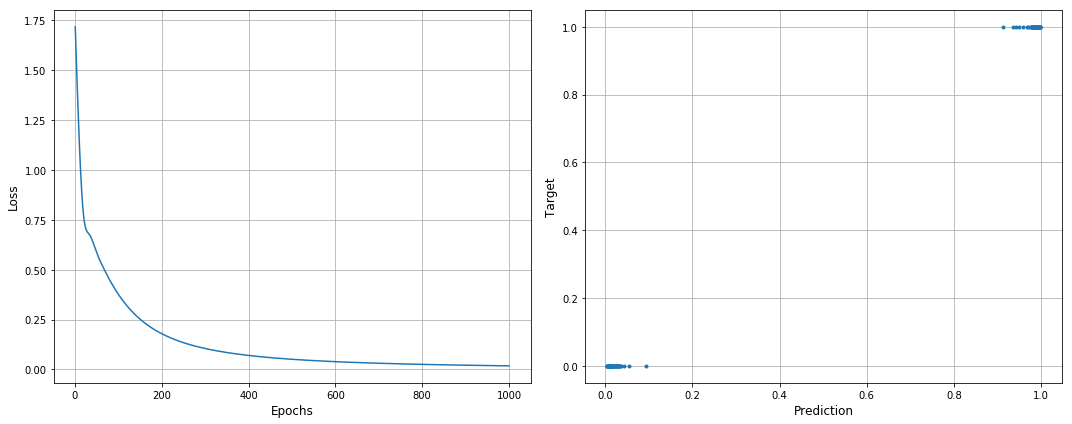

In [9]:
# visualization
idx = np.argsort(output)
target = y.view(-1).numpy()[idx]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(range(1, len(losses) + 1), losses)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True)

ax[1].plot(output, target, '.')
ax[1].set_xlabel('Prediction', fontsize=12)
ax[1].set_ylabel('Target', fontsize=12)
ax[1].grid(True)
plt.tight_layout()
plt.show()